In [1]:
##############################################################################################################
# DESCRIPTION: NADAM more epochs
#              
# RESULTS:     Mejora un poco más.
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

class HyperParams:
    pass

IMG_PATH = "C:/TFMDataset/256_0100_1000/work-2-filtered/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 256
hyperparams.IMG_HEIGHT = 256
hyperparams.EPOCHS = 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_squared_error'

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelB as train
import ReportsH as reports

#nvidia-smi

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3181368183577125356
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5391495168
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11075159598566736484
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
##################
# MODEL DEFINITION
##################

import UnetF as model_factory

model = model_factory.buildModel(hyperparams)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 8)  0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [7]:
model.optimizer.get_config()

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [8]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/TFMDataset/256_0100_1000/work-2-filtered/
Noisy files:606
Nitid files:606
Read dataset. Path: C:/TFMDataset/256_0100_1000/work-2-filtered/validation/
Noisy files:148
Nitid files:148


In [9]:
##################
# TRAIN MODEL
##################
#import tensorflow as tf
#from tensorflow.compat.v1.keras.backend import set_session
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
#config.log_device_placement = True  # to log device placement (on which device the operation ran)
#sess = tf.compat.v1.Session(config=config)
#set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Epoch 1/600
38/38 [==============================] - 13s 153ms/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 2/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 3/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 4/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 5/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 6/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 7/600
38/38 [=======

38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 52/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 53/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 54/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 55/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 56/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 57/600
38/38 [===============

38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 102/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 103/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 104/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 105/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 106/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 107/600
38/38 [=========

38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 152/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 153/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 154/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 155/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 156/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 157/600
38/38 [=========

38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 202/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 203/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 204/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 205/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 206/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 207/600
38/38 [=========

38/38 [==============================] - 4s 97ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 252/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 253/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 254/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 255/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 256/600
38/38 [==============================] - 4s 97ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 257/600
38/38 [=========

38/38 [==============================] - 4s 97ms/step - loss: 9.1206e-04 - mean_squared_error: 9.1206e-04 - val_loss: 8.6312e-04 - val_mean_squared_error: 8.6312e-04
Epoch 300/600
38/38 [==============================] - 4s 97ms/step - loss: 8.9896e-04 - mean_squared_error: 8.9896e-04 - val_loss: 9.6203e-04 - val_mean_squared_error: 9.6203e-04
Epoch 301/600
38/38 [==============================] - 4s 97ms/step - loss: 8.9497e-04 - mean_squared_error: 8.9497e-04 - val_loss: 8.7576e-04 - val_mean_squared_error: 8.7576e-04
Epoch 302/600
38/38 [==============================] - 4s 97ms/step - loss: 8.9684e-04 - mean_squared_error: 8.9684e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 303/600
38/38 [==============================] - 4s 97ms/step - loss: 8.8819e-04 - mean_squared_error: 8.8819e-04 - val_loss: 9.2863e-04 - val_mean_squared_error: 9.2863e-04
Epoch 304/600
38/38 [==============================] - 4s 97ms/step - loss: 8.8145e-04 - mean_squared_error: 8.8145e-04 - 

Epoch 345/600
38/38 [==============================] - 4s 97ms/step - loss: 7.7857e-04 - mean_squared_error: 7.7857e-04 - val_loss: 8.5708e-04 - val_mean_squared_error: 8.5708e-04
Epoch 346/600
38/38 [==============================] - 4s 97ms/step - loss: 7.7821e-04 - mean_squared_error: 7.7821e-04 - val_loss: 8.0830e-04 - val_mean_squared_error: 8.0830e-04
Epoch 347/600
38/38 [==============================] - 4s 97ms/step - loss: 7.7477e-04 - mean_squared_error: 7.7477e-04 - val_loss: 8.1880e-04 - val_mean_squared_error: 8.1880e-04
Epoch 348/600
38/38 [==============================] - 4s 97ms/step - loss: 7.6405e-04 - mean_squared_error: 7.6405e-04 - val_loss: 8.0306e-04 - val_mean_squared_error: 8.0306e-04
Epoch 349/600
38/38 [==============================] - 4s 97ms/step - loss: 7.5837e-04 - mean_squared_error: 7.5837e-04 - val_loss: 8.0154e-04 - val_mean_squared_error: 8.0154e-04
Epoch 350/600
38/38 [==============================] - 4s 97ms/step - loss: 7.7095e-04 - mean_square

38/38 [==============================] - 4s 97ms/step - loss: 6.8289e-04 - mean_squared_error: 6.8289e-04 - val_loss: 8.1516e-04 - val_mean_squared_error: 8.1516e-04
Epoch 391/600
38/38 [==============================] - 4s 97ms/step - loss: 6.8486e-04 - mean_squared_error: 6.8486e-04 - val_loss: 7.9276e-04 - val_mean_squared_error: 7.9276e-04
Epoch 392/600
38/38 [==============================] - 4s 97ms/step - loss: 6.8625e-04 - mean_squared_error: 6.8625e-04 - val_loss: 8.6828e-04 - val_mean_squared_error: 8.6828e-04
Epoch 393/600
38/38 [==============================] - 4s 97ms/step - loss: 6.8431e-04 - mean_squared_error: 6.8431e-04 - val_loss: 9.9542e-04 - val_mean_squared_error: 9.9542e-04
Epoch 394/600
38/38 [==============================] - 4s 97ms/step - loss: 6.7770e-04 - mean_squared_error: 6.7770e-04 - val_loss: 7.3108e-04 - val_mean_squared_error: 7.3108e-04
Epoch 395/600
38/38 [==============================] - 4s 97ms/step - loss: 6.7357e-04 - mean_squared_error: 6.735

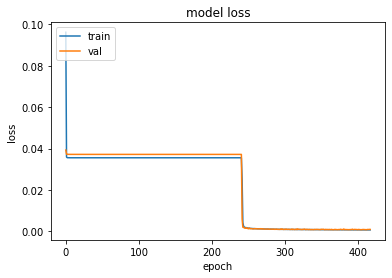

In [10]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [11]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = radiance_limits.nitid_max / 100.0
predictions_metrics, predictions_headers = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, save_pred = False, save_folder_name = "UNET-j", noisy_files = val_noisy_files, nitid_files = val_nitid_files, max_nitid= radiance_limits.nitid_max  )

Images count =148
Best MSE     =147 (0.99)
Best Accuracy=148 (1.00)
MSE-NZ   Pred=0.0009  Noisy=0.0126
MSE      Pred=0.0009  Noisy=0.0111
PSNR     Pred=21.6 dB Noisy=10.8 dB
Accuracy Pred=0.20    Noisy=0.03


Read dataset. Path: C:/TFMDataset/256_0100_1000/work-2-filtered/test/
Noisy files:8
Nitid files:8
Index:0
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0112_01_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0112_01_02nitid_idx134.tif


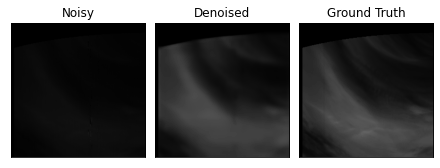

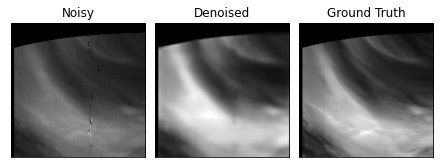

MSE-NZ   Pred=0.0005  Noisy=0.0221
MSE      Pred=0.0005  Noisy=0.0191 BEST
PSNR     Pred=24.7 dB Noisy=8.4 dB BEST
Accuracy Pred=0.22    Noisy=0.00 BEST
******************************************************
Index:1
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0127_01_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0127_01_02nitid_idx134.tif


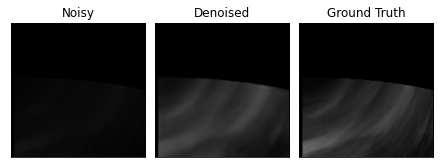

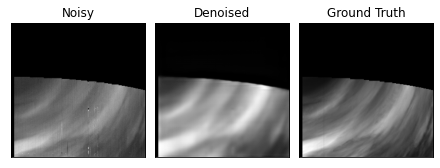

MSE-NZ   Pred=0.0004  Noisy=0.0177
MSE      Pred=0.0004  Noisy=0.0101 BEST
PSNR     Pred=26.1 dB Noisy=9.5 dB BEST
Accuracy Pred=0.45    Noisy=0.04 BEST
******************************************************
Index:2
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0318_04_03noisy_idx157.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0318_04_03nitid_idx146.tif


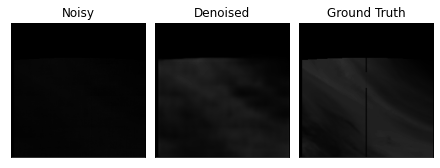

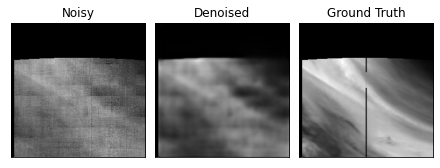

MSE-NZ   Pred=0.0005  Noisy=0.0065
MSE      Pred=0.0005  Noisy=0.0047 BEST
PSNR     Pred=18.1 dB Noisy=6.9 dB BEST
Accuracy Pred=0.33    Noisy=0.02 BEST
******************************************************
Index:3
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0322_04_00noisy_idx014.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0322_04_00nitid_idx017.tif


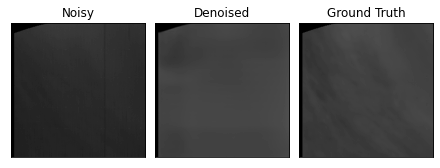

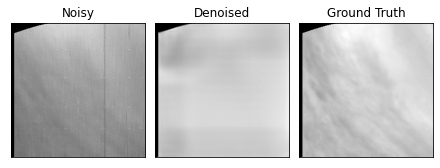

MSE-NZ   Pred=0.0007  Noisy=0.0071
MSE      Pred=0.0007  Noisy=0.0068 BEST
PSNR     Pred=21.3 dB Noisy=11.3 dB BEST
Accuracy Pred=0.09    Noisy=0.00 BEST
******************************************************
Index:4
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0322_04_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0322_04_02nitid_idx134.tif


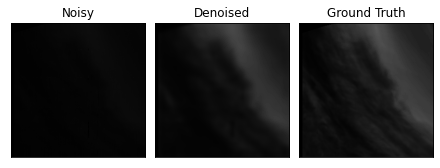

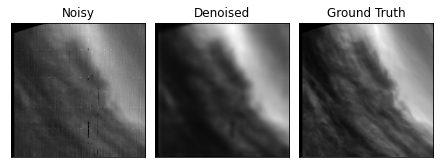

MSE-NZ   Pred=0.0012  Noisy=0.0130
MSE      Pred=0.0012  Noisy=0.0126 BEST
PSNR     Pred=19.9 dB Noisy=9.4 dB BEST
Accuracy Pred=0.05    Noisy=0.00 BEST
******************************************************
Index:5
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0323_04_03noisy_idx157.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0323_04_03nitid_idx146.tif


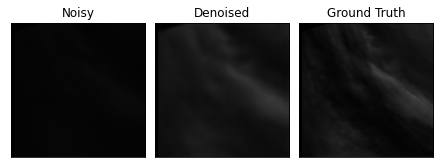

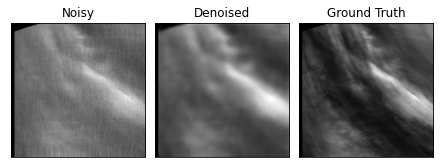

MSE-NZ   Pred=0.0007  Noisy=0.0041
MSE      Pred=0.0007  Noisy=0.0039 BEST
PSNR     Pred=20.6 dB Noisy=12.9 dB BEST
Accuracy Pred=0.12    Noisy=0.04 BEST
******************************************************
Index:6
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0379_01_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0379_01_02nitid_idx134.tif


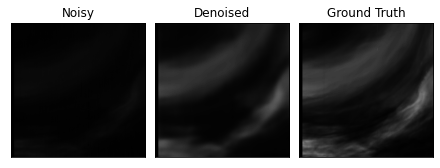

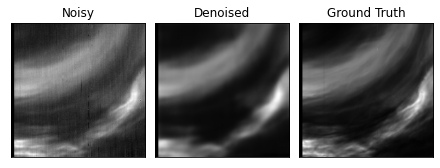

MSE-NZ   Pred=0.0012  Noisy=0.0140
MSE      Pred=0.0012  Noisy=0.0137 BEST
PSNR     Pred=23.0 dB Noisy=12.4 dB BEST
Accuracy Pred=0.09    Noisy=0.02 BEST
******************************************************
Index:7
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0379_05_02noisy_idx123.tif
C:/TFMDataset/256_0100_1000/work-2-filtered/test\VI0379_05_02nitid_idx134.tif


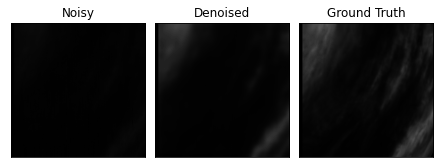

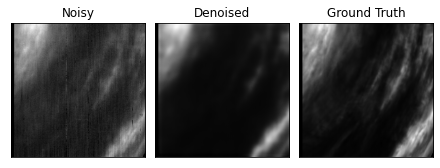

MSE-NZ   Pred=0.0011  Noisy=0.0054
MSE      Pred=0.0011  Noisy=0.0052 BEST
PSNR     Pred=20.1 dB Noisy=13.4 dB BEST
Accuracy Pred=0.16    Noisy=0.07 BEST
******************************************************


In [12]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )

In [13]:
model.save('C:/Users/rdelasheras/TFMJupyter/saves/unet-100_1000-256-b-nadam-b')

INFO:tensorflow:Assets written to: C:/Users/rdelasheras/TFMJupyter/saves/unet-100_1000-256-b-nadam-b\assets
